In [1]:

import pandas as pd
import xarray as xr


In [2]:
path='../data/output/'

# periods
t0=2003;t1=2016
t0_a=1993;t1_a=2016
ds=xr.open_dataset(path+'final_dataset_{}-{}.nc'.format(t0,t1))
print(ds)


<xarray.Dataset>
Dimensions:           (lat: 180, lon: 360, name: 16, nm: 8, unc_type: 3)
Coordinates:
  * lon               (lon) float64 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * lat               (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * name              (name) object 'AIS_CSR' 'AIS_IMB' ... 'LWS_JPL' 'LWS_WGP'
  * unc_type          (unc_type) object 'temporal' 'spatial' 'intrinsic'
  * nm                (nm) object 'WN' 'PL' 'PLWN' 'AR1' ... 'AR9' 'ARF' 'GGMWN'
Data variables:
    trend             (name, lat, lon) float64 ...
    uncs              (unc_type, name, lat, lon) float64 ...
    unc_total         (name, lat, lon) float64 ...
    nm_sel            (name, lat, lon) float64 ...
    spatial_unc_norm  (name, lat, lon) float64 ...


In [3]:
ds_a=xr.open_dataset(path+'final_dataset_{}-{}.nc'.format(t0_a,t1_a))
print(ds_a)

<xarray.Dataset>
Dimensions:           (lat: 180, lon: 360, name: 8, nm: 8, unc_type: 3)
Coordinates:
  * lon               (lon) float64 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * lat               (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * name              (name) object 'AIS_IMB' 'AIS_UCI' ... 'LWS_GWB' 'LWS_WGP'
  * unc_type          (unc_type) object 'temporal' 'spatial' 'intrinsic'
  * nm                (nm) object 'WN' 'PL' 'PLWN' 'AR1' ... 'AR9' 'ARF' 'GGMWN'
Data variables:
    trend             (name, lat, lon) float64 ...
    uncs              (unc_type, name, lat, lon) float64 ...
    unc_total         (name, lat, lon) float64 ...
    nm_sel            (name, lat, lon) float64 ...
    spatial_unc_norm  (name, lat, lon) float64 ...


<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360)
Coordinates:
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    land_mask  (lat, lon) float64 ...
Attributes:
    CDI:                        Climate Data Interface version 1.9.8 (https:/...
    Conventions:                CF-1.5
    history:                    Tue Nov 10 09:51:52 2020: cdo remapbil,r360x1...
    institution:                JPL
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    standard_name_vocabulary:   CF-1.5
    title:                      CRI filter land mask
    summary:                    Land mask which is used in combination with t...
    filename:                   NETCDF/RL06Mv2/LAND_MASK.CRIv01.nc
    variable:                   land_mask
    creator_name:               Alex Gardner
    creator_email:              alex.s.gardner@jpl.nasa.gov
    project:               

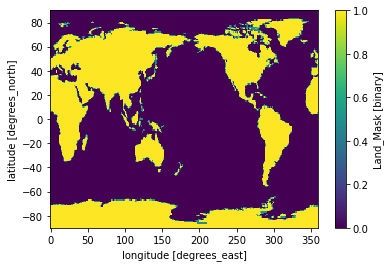

In [4]:
mask=xr.open_dataset(path+'../LAND_MASK.CRI_360x180.nc')
print(mask)
mask.land_mask.plot()

In [5]:
df= pd.read_pickle(path+'coastal_examples_10-{}-{}.p'.format(t0_a,t1_a))
print(df)

     lon   lat                  City       Country  JPL_trend_tot  \
0   18.0 -33.5             Cape Town  SOUTH AFRICA            0.0   
1  107.0  -6.5               Jakarta     INDONESIA            0.0   
2  283.0 -12.5                  Lima          PERU            0.0   
3   45.0   2.5  Muqdisho (Mogadishu)       SOMALIA            0.0   
4  317.0 -22.5        Rio_de_Janeiro        BRAZIL            0.0   
5    4.0  51.5             Rotterdam   NETHERLANDS            0.0   
6  151.0 -33.5                Sydney     AUSTRALIA            0.0   
7  140.0  35.5                 Tokyo         JAPAN            0.0   
8  237.0  49.5             Vancouver        CANADA            0.0   
9  284.0  36.5        Virginia Beach            US            0.0   

   JPL_unc_tot  JPL_unc_temporal  JPL_unc_spatial  JPL_unc_intrinsic  \
0          0.0               0.0              0.0                0.0   
1          0.0               0.0              0.0                0.0   
2          0.0          

In [6]:
df_global=pd.read_pickle(path+'OM_reconstructions_{}-{}.p'.format(t0_a,t1_a))
print(df_global)

         lon   lat  JPL_trend_tot  JPL_unc_tot  JPL_unc_temporal  \
0        0.0 -89.5            0.0          0.0               0.0   
1        1.0 -89.5            0.0          0.0               0.0   
2        2.0 -89.5            0.0          0.0               0.0   
3        3.0 -89.5            0.0          0.0               0.0   
4        4.0 -89.5            0.0          0.0               0.0   
...      ...   ...            ...          ...               ...   
64795  355.0  89.5            0.0          0.0               0.0   
64796  356.0  89.5            0.0          0.0               0.0   
64797  357.0  89.5            0.0          0.0               0.0   
64798  358.0  89.5            0.0          0.0               0.0   
64799  359.0  89.5            0.0          0.0               0.0   

       JPL_unc_spatial  JPL_unc_intrinsic  CSR_trend_tot  CSR_unc_tot  \
0                  0.0                0.0            0.0          0.0   
1                  0.0               

In [7]:
df=pd.read_pickle(path+'global-final_combos-{}-{}_v2.p'.format(t0,t1))
print(df)


  combinations          dataset     trend  total_unc  temp_unc  temp_intr_unc  \
0          JPL            [JPL]  1.739089   0.244278  0.122085       0.125288   
1          CSR            [CSR]  1.590078   0.233920  0.103653       0.103653   
2      IMB+WGP       [IMB, WGP]  1.750093   0.242917  0.119474       0.122613   
3  IMB+GWB+ZMP  [IMB, GWB, ZMP]  1.392727   0.250686  0.134569       0.137363   
4      UCI+WGP       [UCI, WGP]  2.119112   0.235237  0.106590       0.106590   
5  UCI+GWB+ZMP  [UCI, GWB, ZMP]  1.761745   0.243251  0.123272       0.123272   

   trend_OLS  trend_OLS_reg                                 names  
0   1.724461       1.714828  [AIS_JPL, GIS_JPL, GLA_JPL, LWS_JPL]  
1   1.563072       1.555731  [AIS_CSR, GIS_CSR, GLA_CSR, LWS_CSR]  
2   1.969397       1.872231  [AIS_IMB, GIS_IMB, GLA_WGP, LWS_WGP]  
3   1.682053       1.374917  [AIS_IMB, GIS_IMB, GLA_ZMP, LWS_GWB]  
4   2.150198       2.144766  [AIS_UCI, GIS_UCI, GLA_WGP, LWS_WGP]  
5   1.862854       1.647

In [8]:
df_reg = pd.read_pickle(path+'OM_reconstructions_{}-{}.p'.format(t0,t1))
print(df_reg)

         lon   lat  JPL_trend_tot  JPL_unc_tot  JPL_unc_temporal  \
0        0.0 -89.5       1.530472     4.193730          0.979790   
1        1.0 -89.5       1.531467     4.189740          0.979792   
2        2.0 -89.5       1.532447     4.185802          0.979795   
3        3.0 -89.5       1.533412     4.181915          0.979797   
4        4.0 -89.5       1.534363     4.178079          0.979800   
...      ...   ...            ...          ...               ...   
64795  355.0  89.5      -0.208612     0.862400          0.817177   
64796  356.0  89.5      -0.206725     0.862356          0.817130   
64797  357.0  89.5      -0.204826     0.862313          0.817084   
64798  358.0  89.5      -0.202917     0.862273          0.817037   
64799  359.0  89.5      -0.201000     0.862235          0.816991   

       JPL_unc_spatial  JPL_unc_intrinsic  JPL_unc_AIS  JPL_unc_GIS  \
0             4.077038           0.071732     4.079606     0.074244   
1             4.072933           0.071732